In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

c:\Users\DS-31\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
# 1. Load the California Housing Dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 2. Preprocess the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)  # Standardize features
X_test_std = scaler.transform(X_test)

In [6]:
X_train_std.shape

(16512, 8)

In [7]:
# 3. Building a Multi Layered Perceptron

# Layers are arranged linearly; one after another
model = Sequential()

# Defining the input layer explicitly with shape matching the number of features
model.add(Input(shape=(X_train_std.shape[1],)))

# Adding subsequent layers

# First hidden layer connected directly with the input layer
# Need to mention the input dimension (number of features / columns)
model.add(Dense(64))

model.add(Activation('relu'))  # Activation function for non-linearity detection


# Second hidden layer with 32 neurons
# Input to this layer comes from output of first hidden layer
model.add(Dense(32))

model.add(Activation('relu'))  # ReLu = rectified linear unit


# Third hidden layer with 16 neurons
# Input dimension is automatically inferred
model.add(Dense(16))

model.add(Activation('relu'))

# Output layer with 1 neuron
model.add(Dense(1))

model.add(Activation('linear'))  # Activation function for regression

In [8]:
# 4. Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])  # Mean Absolute Error (MAE) for evaluation

In [9]:
# 5. Train the model
history = model.fit(X_train_std, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8290 - mae: 0.6190 - val_loss: 0.4397 - val_mae: 0.4705
Epoch 2/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.3797 - mae: 0.4400 - val_loss: 0.4102 - val_mae: 0.4409
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.3574 - mae: 0.4248 - val_loss: 0.3841 - val_mae: 0.4292
Epoch 4/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.3456 - mae: 0.4149 - val_loss: 0.3677 - val_mae: 0.4291
Epoch 5/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3300 - mae: 0.4049 - val_loss: 0.3553 - val_mae: 0.4184


In [10]:
# 6. Evaluate the model
loss, mae = model.evaluate(X_test_std, y_test, verbose=0)
print(f"Test Mean Absolute Error: {mae:.2f}")

Test Mean Absolute Error: 0.41


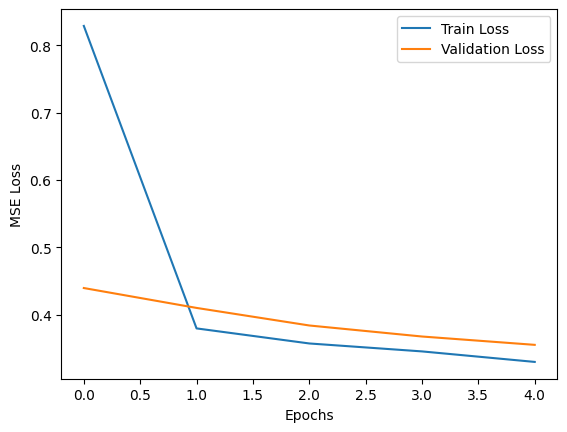

In [11]:
# 7. Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()